우선 문제를 돌려보기 위해서, 지난 프로젝트 때 했던 친구들을 하나하나 넣어봅니다. 먼저 import를 해볼까요.

In [11]:
! pip install nltk
! pip install matplotlib

You should consider upgrading via the '/Users/ffdd270/python_jupyter_notebook_lab/new_venv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/ffdd270/python_jupyter_notebook_lab/new_venv/bin/python -m pip install --upgrade pip' command.
zsh:1: command not found: wget
zsh:1: command not found: wget
zsh:1: command not found: wget


[nltk_data] Downloading package punkt to /Users/ffdd270/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ffdd270/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/ffdd270/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


b'\nMr. Sherlock Holmes, who was usually very late in the mornings, save\nupon those not infrequent occasions when he was up all night, was seated\nat the breakfast table. I stood upon the hearth-rug and picked up the\nstick which our visitor had left behind him the night before. It was a\nfine, thi

Number of words for doyle = 48767


Number of words for wells = 48873


Number of words for unknown = 63303

length shortest corpus = 48767



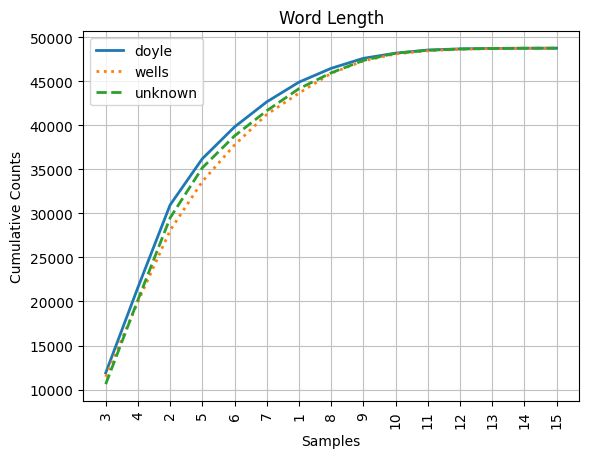

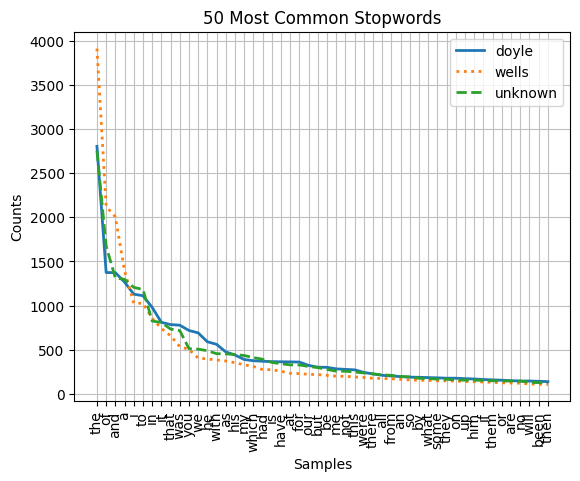

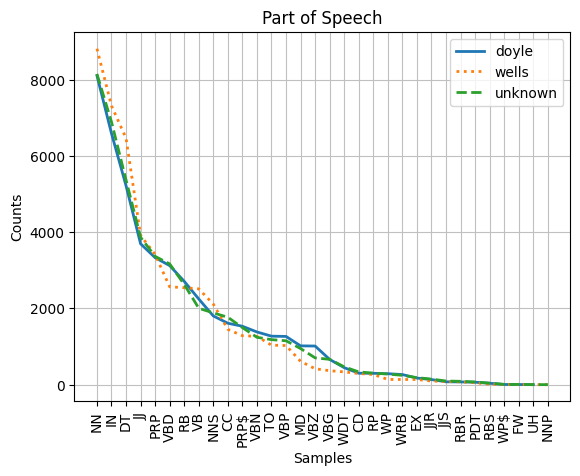

Chi-squared for doyle = 3753.4
Chi-squared for wells = 5591.3
Most-likely author by vocabulary is doyle

Jaccard Similarity for doyle = 0.3417275245530093
Jaccard Similarity for wells = 0.3018446059250978
Most-likely author by similarity is doyle


In [37]:
import urllib.request
import os.path
# 여기서 먼저 파일 확인.

if not os.path.isfile("war.txt"):
    url_list = [
        "https://raw.githubusercontent.com/rlvaugh/Real_World_Python/master/Chapter_2/hound.txt",
        "https://raw.githubusercontent.com/rlvaugh/Real_World_Python/master/Chapter_2/war.txt",
        "https://raw.githubusercontent.com/rlvaugh/Real_World_Python/master/Chapter_2/lost.txt",
    ]

    name_list = ["hound.txt", "war.txt", "lost.txt"]

    for i in range(3):
        url = url_list[i]
        file_name = name_list[i]

        res = urllib.request.urlopen(url)
        file = open(file_name, "w")
        file.write(str(res.read()))
        file.close()


def text_to_string(filename):
    strings = []
    with open(filename) as f:
        strings.append(f.read())
    return '\n'.join(strings)

import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

LINES = ['-', ':', '--']  # Line style for plots.

def main():
    # Load text files into dictionary by author.
    strings_by_author = dict()
    strings_by_author['doyle'] = text_to_string('hound.txt')
    strings_by_author['wells'] = text_to_string('war.txt')
    strings_by_author['unknown'] = text_to_string('lost.txt')

    # Check results of reading files.
    print(strings_by_author['doyle'][:300])

    # Tokenize text strings and run stylometric tests.
    words_by_author = make_word_dict(strings_by_author)
    len_shortest_corpus = find_shortest_corpus(words_by_author)

    word_length_test(words_by_author, len_shortest_corpus)
    stopwords_test(words_by_author, len_shortest_corpus)
    parts_of_speech_test(words_by_author, len_shortest_corpus)
    vocab_test(words_by_author)
    jaccard_test(words_by_author, len_shortest_corpus)

def text_to_string(filename):
    """Read a text file and return a string."""
    with open(filename) as infile:
        return infile.read()

def make_word_dict(strings_by_author):
    """Return dictionary of tokenized words by corpus by author."""
    words_by_author = dict()
    for author in strings_by_author:
        tokens = nltk.word_tokenize(strings_by_author[author])
        words_by_author[author] = ([token.lower() for token in tokens
                                    if token.isalpha()])
    return words_by_author

def find_shortest_corpus(words_by_author):
    """Return length of shortest corpus."""
    word_count = []
    for author in words_by_author:
        word_count.append(len(words_by_author[author]))
        print('\nNumber of words for {} = {}\n'.
              format(author, len(words_by_author[author])))
    len_shortest_corpus = min(word_count)
    print('length shortest corpus = {}\n'.format(len_shortest_corpus))
    return len_shortest_corpus

def word_length_test(words_by_author, len_shortest_corpus):
    """Plot word length freq by author, truncated to shortest corpus length."""
    by_author_length_freq_dist = dict()
    plt.figure(1)
    plt.ion()

    for i, author in enumerate(words_by_author):
        word_lengths = [len(word) for word in words_by_author[author]
                        [:len_shortest_corpus]]
        by_author_length_freq_dist[author] = nltk.FreqDist(word_lengths)
        by_author_length_freq_dist[author].plot(15,
                                                linestyle=LINES[i],
                                                label=author,
                                                title='Word Length',
                                                cumulative=True,
                                                show=False)
    plt.ioff()
    plt.legend()
    # plt.show()  # Uncomment to see plot while coding function.

'''
        pylab.plot(freqs, **kwargs)
        pylab.xticks(range(len(samples)), [compat.text_type(s) for s in samples], rotation=90)
        pylab.xlabel("Samples")
        pylab.ylabel(ylabel)
        pylab.show()
'''

def stopwords_test(words_by_author, len_shortest_corpus):
    """Plot stopwords freq by author, truncated to shortest corpus length."""
    stopwords_by_author_freq_dist = dict()
    plt.figure(2)
    plt.ion()
    stop_words = set(stopwords.words('english'))  # Use set for speed.
    #print('Number of stopwords = {}\n'.format(len(stop_words)))
    #print('Stopwords = {}\n'.format(stop_words))
    for i, author in enumerate(words_by_author):
        stopwords_by_author = [word for word in words_by_author[author]
                               [:len_shortest_corpus] if word in stop_words]
        stopwords_by_author_freq_dist[author] = nltk.FreqDist(stopwords_by_author)
        stopwords_by_author_freq_dist[author].plot(50,
                                                   label=author,
                                                   linestyle=LINES[i],
                                                   title=
                                                   '50 Most Common Stopwords',
                                                   show=False)
    plt.ioff()
    plt.legend()
##    plt.show()  # Uncomment to see plot while coding function.

def parts_of_speech_test(words_by_author, len_shortest_corpus):
    """Plot author use of parts-of-speech such as nouns, verbs, adverbs,etc."""
    by_author_pos_freq_dist = dict()
    plt.figure(3)
    plt.ion()
    for i, author in enumerate(words_by_author):
        pos_by_author = [pos[1] for pos in nltk.pos_tag(words_by_author[author]
                                                        [:len_shortest_corpus])]
        by_author_pos_freq_dist[author] = nltk.FreqDist(pos_by_author)
        by_author_pos_freq_dist[author].plot(35,
                                             label=author,
                                             linestyle=LINES[i],
                                             title='Part of Speech',
                                             show=False)

    plt.ioff()
    plt.legend()

    plt.show()
    # Windows PowerShell users may need plt.show(block=True).

def vocab_test(words_by_author):
    """Compare author vocabularies using the Chi Squared statistical test."""
    chisquared_by_author = dict()
    for author in words_by_author:
        if author != 'unknown':
            # Combine corpus for author & unknown & find 1000 most-common words.
            combined_corpus = (words_by_author[author] +
                               words_by_author['unknown'])
            author_proportion = (len(words_by_author[author])/
                                 len(combined_corpus))
            combined_freq_dist = nltk.FreqDist(combined_corpus)
            most_common_words = list(combined_freq_dist.most_common(1000))
            chisquared = 0

            # Calculate observed vs. expected word counts.
            for word, combined_count in most_common_words:
                observed_count_author = words_by_author[author].count(word)
                expected_count_author = combined_count * author_proportion
                chisquared += ((observed_count_author -
                                expected_count_author)**2 /
                               expected_count_author)
                chisquared_by_author[author] = chisquared
            print('Chi-squared for {} = {:.1f}'.format(author, chisquared))


    most_likely_author = min(chisquared_by_author, key=chisquared_by_author.get)
    print('Most-likely author by vocabulary is {}\n'.format(most_likely_author))

def jaccard_test(words_by_author, len_shortest_corpus):
    """Calculate Jaccard similarity of each known corpus to unknown corpus."""
    jaccard_by_author = dict()
    unique_words_unknown = set(words_by_author['unknown']
                               [:len_shortest_corpus])
    authors = (author for author in words_by_author if author != 'unknown')
    for author in authors:
        unique_words_author = set(words_by_author[author][:len_shortest_corpus])
        shared_words = unique_words_author.intersection(unique_words_unknown)
        jaccard_sim = (float(len(shared_words))/ (len(unique_words_author) +
                                                  len(unique_words_unknown) -
                                                  len(shared_words)))
        jaccard_by_author[author] = jaccard_sim
        print('Jaccard Similarity for {} = {}'.format(author, jaccard_sim))

    most_likely_author = max(jaccard_by_author, key=jaccard_by_author.get)
    print('Most-likely author by similarity is {}'.format(most_likely_author))


main()
